<a href="https://colab.research.google.com/github/EJ-Ellie-John/NEDpython/blob/main/DL_Class_4_Sequential_DNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

In [5]:
import tensorflow as tf
from tensorflow import keras #important
from keras.datasets import fashion_mnist

In [6]:
keras.__version__

'3.10.0'

In [7]:
tf.__version__

'2.19.0'

In [8]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#train test split 42
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=42)

In [12]:
X_train.shape, X_test.shape, X_val.shape

((50000, 28, 28), (10000, 28, 28), (10000, 28, 28))

In [13]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,  37,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 112,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          2,   2,   0,   0,   0,   0,   0,   0,   0,   7, 119,  72,  56,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          0,   0,   0,   0,   2,  21,  25,  32,  21, 135,  60,   0, 140,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          9,  39,  58,  65,  81,  60,  95,  44, 102, 140,  32,   2, 138,
         23,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        102, 126,  65,  21,  25,  23,  30,   0,  77, 161,   0, 100, 149,
         23,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   7,
        140, 105,  93, 126, 131, 168, 231, 173,  88, 182, 119,   2,  28,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         98, 131, 203, 135,  35,  25,   0, 133, 131,  95,  95,  18,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         63, 152,  16,   0,   0,   0,   0,   2,  53,  60,  70, 100,  30,
          0,   2],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25,
         84,   0,   0,   2,   0,   0,   0,  32,  37,  25,  72,  37, 128,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  74,
          9,   0,   0,   0,   0,   0,   2,  67,  21,  44,   9,   0,  51,
         93,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,  44,
         79,   0,   0,   0,   0,   0,  42,  58,  42,  65,  21,   0,   0,
         95,  51],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         88,  60,   0,   0,   0,   0,  67,  25,  28,  46,   0,   0,  39,
        159,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  67,  70,   2,   0,   0,  44,  21,  21,  67,  81,  88, 149,
        128,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  67, 112,  23,  32,  49,  58,  46,  60, 163, 105, 102,
        112,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  18,  81,  51,  28,
         30,  11,  11,  65,  60,  88,  60,  35, 102, 191, 114, 180, 102,
         86,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  74,  65,  53,  49,
         53,  42,  44,  39,  72,  74,  16, 123, 187,  16,   0, 166, 128,
         49,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  88,  16,   0,   0,
          0,   0,   7,   0,  91,  39, 116, 182,   0,   0,   0, 131, 116,
         37,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  56, 198, 156,   0,
          0,   0,   0,  16,  70,  53, 182,   0,   0,   0,   0,  86, 116,
         30,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  28,  63, 149, 133,
          4,   0,   0, 119, 140, 145,   7,   0,   4,   2,   0,  70, 116,
         18,   0],
       [  0,   0,   0,   0,   0,   0,  14,  42,  46,  39,  23,  21, 119,
        105,   0,  60,  98, 170,  11,   0,   0,   2,   4,   0,  74, 116,
         14,   0],
       [  2,   0,   0,   0,   2, 100,  84,  77, 184, 236,  88,  21,  30,
         77, 116,  63, 138, 147,   0,   0,   0,   0,   2,   0,  63, 107,
          4,   0],
       [  0,   0,   0,   0,   4, 109,  63,   4,   7, 100,  56,  18,  25,
         35,  74, 114, 119,   0,   0,   0,   0,   0,   4,   0,  60, 105,
          2,   0],
       [  2,  21,  84, 126,  25,  30, 198,  23,   4,  11,  23,  42,  39,
         28,   7, 233,  21,   0,   0,   0,   0,   0,   2,   0,  63, 107,
          0,   0],
       [114, 138,  70,  49,  39,  23, 21

In [14]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   3,   1,   0,   0,   7,   0,  37,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   2,   0,  27,  84,  11,   0,   0,   0,   0,   0,   0, 119,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,  88, 143, 110,   0,   0,   0,   0,  22,  93, 106,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          4,   0,  53, 129, 120, 147, 175, 157, 166, 135, 154, 168, 140,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
          0,  11, 137, 130, 128, 160, 176, 159, 167, 178, 149, 151, 144,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   2,   1,   0,   3,   0,
          0, 115, 114, 106, 137, 168, 153, 156, 165, 167, 143, 157, 158,
         11,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   3,   0,   0,
         89, 139,  90,  94, 153, 149, 131, 151, 169, 172, 143, 159, 169,
         48,   0],
       [  0,   0,   0,   0,   0,   0,   2,   4,   1,   0,   0,   0,  98,
        136, 110, 109, 110, 162, 135, 144, 149, 159, 167, 144, 158, 169,
        119,   0],
       [  0,   0,   2,   2,   1,   2,   0,   0,   0,   0,  26, 108, 117,
         99, 111, 117, 136, 156, 134, 154, 154, 156, 160, 141, 147, 156,
        178,   0],
       [  3,   0,   0,   0,   0,   0,   0,  21,  53,  92, 117, 111, 103,
        115, 129, 134, 143, 154, 165, 170, 154, 151, 154, 143, 138, 150,
        165,  43],
       [  0,   0,  23,  54,  65,  76,  85, 118, 128, 123, 111, 113, 118,
        127, 125, 139, 133, 136, 160, 140, 155, 161, 144, 155, 172, 161,
        189,  62],
       [  0,  68,  94,  90, 111, 114, 111, 114, 115, 127, 135, 136, 143,
        126, 127, 151, 154, 143, 148, 125, 162, 162, 144, 138, 153, 162,
        196,  58],
       [ 70, 169, 129, 104,  98, 100,  94,  97,  98, 102, 108, 106, 119,
        120, 129, 149, 156, 167, 190, 190, 196, 198, 198, 187, 197, 189,
        184,  36],
       [ 16, 126, 171, 188, 188, 184, 171, 153, 135, 120, 126, 127, 146,
        185, 195, 209, 208, 255, 209, 177, 245, 252, 251, 251, 247, 220,
        206,  49],
       [  0,   0,   0,  12,  67, 106, 164, 185, 199, 210, 211, 210, 208,
        190, 150,  82,   8,   0,   0,   0, 178, 208, 188, 175, 162, 158,
        151,  11],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [15]:
#classification of index
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

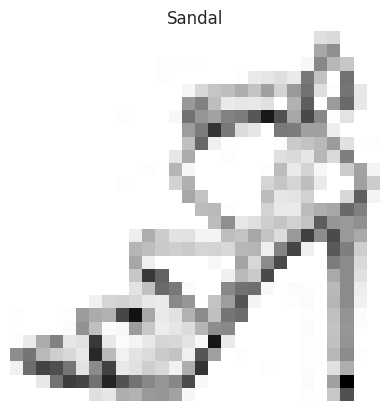

In [16]:
plt.imshow(X_train[0], cmap="binary") #cmap="gray"
plt.title(class_names[y_train[0]]) # print title of image from index 0
plt.axis("off")
plt.show()

In [17]:
# feature scaling basically normalization
X_train, X_val, X_test, = X_train / 255.0, X_val /255.0, X_test / 255.0


#Sequential model DNN

In [18]:
#Sequential model DNN
tf.keras.backend.clear_session() #free up memory
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
model = keras.models.Sequential(
    [
  keras.layers.Flatten(input_shape=X_train.shape[1:], name = "InputLayer"),
  keras.layers.Dense(300, activation="relu",  name = "HiddenLayer1"),
  keras.layers.Dense(100, activation="relu",  name = "HiddenLayer2"),
  keras.layers.Dense(10, activation="softmax", name = "OutputLayer")
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
weights, biases = model.layers[1].get_weights()


In [40]:
weights.shape, biases.shape

((784, 300), (300,))

In [32]:
# Multiclassification
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [33]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8812 - loss: 0.3279 - val_accuracy: 0.8699 - val_loss: 0.3697
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8839 - loss: 0.3199 - val_accuracy: 0.8708 - val_loss: 0.3661
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8874 - loss: 0.3126 - val_accuracy: 0.8726 - val_loss: 0.3614
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8899 - loss: 0.3058 - val_accuracy: 0.8734 - val_loss: 0.3566
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8919 - loss: 0.2992 - val_accuracy: 0.8744 - val_loss: 0.3521
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8941 - loss: 0.2931 - val_accuracy: 0.8756 - val_loss: 0.3489
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8963 - loss: 0.2871 - val_accuracy: 0.8754 - val_loss: 0.3457
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8988 - loss: 0.2815

In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputlayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,612 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

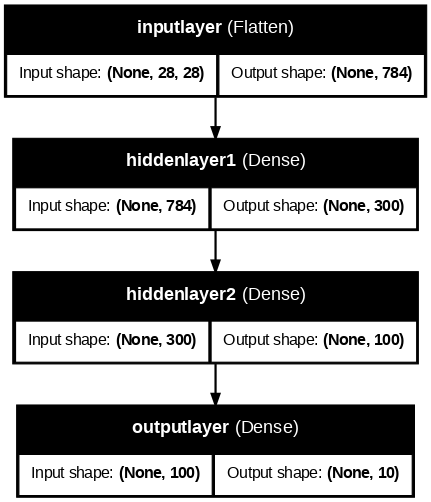

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file ="model.png", show_shapes=True, show_layer_names=True, dpi=80)

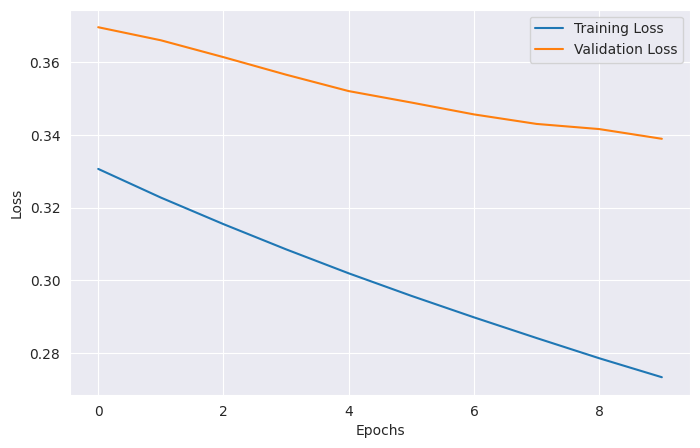

In [37]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()